# Install required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Import CSV Data as a pandas DataFrame

In [3]:
train_df = pd.read_csv("C:\\Users\\aniru\\Downloads\\archive (3)\\train.csv")
train_df.head()
print(train_df.shape)

(3599999, 3)


In [4]:
train_df.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


### CSV size is too large, and there are no headers, so going to import 16,000 rows for training, and 4,000 for test (80-20 split) and setting header to None. 

In [68]:
train_df = pd.read_csv("C:\\Users\\aniru\\Downloads\\archive (3)\\train.csv", header = None, nrows = 16001)
test_df = pd.read_csv("C:\\Users\\aniru\\Downloads\\archive (3)\\test.csv",header = None, nrows = 4001 )

In [69]:
train_df.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [70]:
train_df.shape, test_df.shape

((16001, 3), (4001, 3))

## Dataset Information
 - 1st Column (Polarity) - Sentiment of review -> (2->Positive, 1->Negative)
 - 2nd Column (Title) - Review Heading
 - 3rd Column (Text) - Review Body

## Dataset Preprocessing
The datasets as of now have no proper headings. The polarity column is also going to be changed to make it more understandable by mapping all the positive reviews (those labelled 2) to 1, and the negative reviews (those labelled 1) to 0

In [71]:
def map_values(value):
    if pd.isnull(value):
        return value  # or handle null values as needed
    elif value == 2:
        return 1
    elif value == 1:
        return 0

    
new_column_names = {
    1 : 'review_title',
    2 : 'review_body'
}
train_df['sentiment'] = train_df[0].apply(map_values)
test_df['sentiment'] = test_df[0].apply(map_values)

In [72]:

train_df.rename(columns=new_column_names, inplace=True)
train_df = train_df.drop(train_df.columns[0], axis = 1)

test_df.rename(columns=new_column_names, inplace=True)
test_df = test_df.drop(test_df.columns[0], axis = 1)


In [73]:
train_df.head()

,review_title,review_body,sentiment
0,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,1
1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,1
2,Amazing!,This soundtrack is my favorite music of all ti...,1
3,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,1
4,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",1


In [74]:
test_df.head()

,review_title,review_body,sentiment
0,Great CD,My lovely Pat has one of the GREAT voices of h...,1
1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,1
2,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,0
3,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,1
4,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,1


## Now the datasets have appropriate headings, and clear labelling


## Datachecks to perform 
- Check missing values
- Check duplicates
- Check data type
- Check sentiment distribution
- Check statistics of dataset

### Checking missing values

In [75]:
train_df.isna().sum()

review_title    1
review_body     0
sentiment       0
dtype: int64

In [76]:
test_df.isna().sum()

review_title    2
review_body     0
sentiment       0
dtype: int64

In [81]:
train_df.dropna(subset=['review_title'], inplace=True)
test_df.dropna(subset=['review_title'], inplace = True)

In [82]:
train_df.isna().sum()

review_title    0
review_body     0
sentiment       0
dtype: int64

In [83]:
test_df.isna().sum()

review_title    0
review_body     0
sentiment       0
dtype: int64

### Rows with missing values have been removed. No more missing values present in the data

### Checking duplicates

In [84]:
train_df.duplicated().sum()

0

In [85]:
test_df.duplicated().sum()

0

### No duplicated rows

### Checking data type

In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 0 to 16000
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_title  16000 non-null  object
 1   review_body   16000 non-null  object
 2   sentiment     16000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 500.0+ KB


### Examining distribution of sentiment labels

In [90]:
train_df['sentiment'].value_counts()

sentiment
1    8019
0    7981
Name: count, dtype: int64

In [91]:
test_df['sentiment'].value_counts()

sentiment
1    2048
0    1951
Name: count, dtype: int64

### Roughly equal number of positive and negative reviews in both datasets

In [98]:
(train_df['review_body'][6])

'This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon\'s family and friends--or perhaps, by herself! I can\'t imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a "worst book" contest. I can\'t believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on "To Kill a Mockingbird"--a book I am quite sure Ms. Haddon never heard of. Anyway, unless you are in a mood to send a book to someone as a joke---stay far, far away from this one!'

#### Notice how in the above review, there are escape charachters present. We will write a function to get rid of that

In [99]:
import re
def remove_escape_charachters(text):
    pattern = r"\\'"
    replacement = "'"
    return re.sub(pattern,replacement,text)

## Explore further relationships between the reviews and sentiments
### - Number of words in reviews
### - Number of fully capitalised words in reviews

In [100]:
import spacy 
nlp = spacy.load("en_core_web_lg")

In [106]:
def word_count(text):
    doc = nlp(text)
    return sum(1 for token in doc if not token.is_punct)


In [109]:
train_df['body_word_count'] = train_df['review_body'].apply(word_count)
train_df['title_word_count'] = train_df['review_title'].apply(word_count)

test_df['body_word_count'] = test_df['review_body'].apply(word_count)
test_df['title_word_count'] = test_df['review_title'].apply(word_count)

In [112]:
def count_full_capitalized(review):
    doc = nlp(review)
    count = sum(1 for token in doc if token.text.isupper())
    return count

In [113]:
train_df['full_capitalized_count'] = train_df['review_body'].apply(count_full_capitalized)
test_df['full_capitalized_count'] = test_df['review_body'].apply(count_full_capitalized)

In [114]:
train_df.head()

,review_title,review_body,sentiment,body_word_count,title_word_count,full_capitalized_count
0,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,1,75,6,3
1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,1,96,6,6
2,Amazing!,This soundtrack is my favorite music of all ti...,1,136,1,5
3,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,1,120,2,4
4,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",1,80,10,0


In [115]:
test_df.head()

,review_title,review_body,sentiment,body_word_count,title_word_count,full_capitalized_count
0,Great CD,My lovely Pat has one of the GREAT voices of h...,1,105,2,15
1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,1,137,15,7
2,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,0,54,5,2
3,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,1,32,7,2
4,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,1,68,5,4


In [118]:
average_body_word_count = train_df['body_word_count'].mean()
average_title_word_count = train_df['title_word_count'].mean()

positive_body_words = train_df.loc[train_df['sentiment'] == 1, 'body_word_count'].mean()
positive_title_words = train_df.loc[train_df['sentiment'] == 1, 'title_word_count'].mean()

negative_body_words = train_df.loc[train_df['sentiment'] == 0, 'body_word_count'].mean()
negative_title_words = train_df.loc[train_df['sentiment'] == 0, 'title_word_count'].mean()

print(f"Average review body length in words : {average_body_word_count}")
print(f"Average review title length in words : {average_title_word_count}")
print("----------------")
print(f"Average review body length in words of POSITIVE reviews : {positive_body_words}")
print(f"Average review title length in words of POSITIVE reviews : {positive_title_words}")
print("----------------")
print(f"Average review body length in words of NEGATIVE reviews : {negative_body_words}")
print(f"Average review title length in words of NEGATIVE reviews : {negative_title_words}")

Average review body length in words : 77.0115
Average review title length in words : 4.4239375
----------------
Average review body length in words of POSITIVE reviews : 74.28943758573388
Average review title length in words of POSITIVE reviews : 4.339443820925302
----------------
Average review body length in words of NEGATIVE reviews : 79.74652299210625
Average review title length in words of NEGATIVE reviews : 4.508833479513846


## The average number of words in negative reviews is slightly greater than that for positive reviews, but is mostly similar in length

In [121]:
average_capitalized_count = train_df['full_capitalized_count'].mean()
average_positive_capitalized = train_df.loc[train_df['sentiment'] == 1, 'full_capitalized_count'].mean()
average_negative_capitalized = train_df.loc[train_df['sentiment'] == 0, 'full_capitalized_count'].mean()

print(f"Average number of fully capitalized words in review body : {average_capitalized_count}")
print(f"Average number of fully capitalized words in positive reviews : {average_positive_capitalized}")
print(f"Average number of fully capitalized words in negative reviews : {average_negative_capitalized}")

Average number of fully capitalized words in review body : 3.648625
Average number of fully capitalized words in positive reviews : 3.422995385958349
Average number of fully capitalized words in negative reviews : 3.8753289061521112


## Not much variation in this regard either

## Some data visualizations

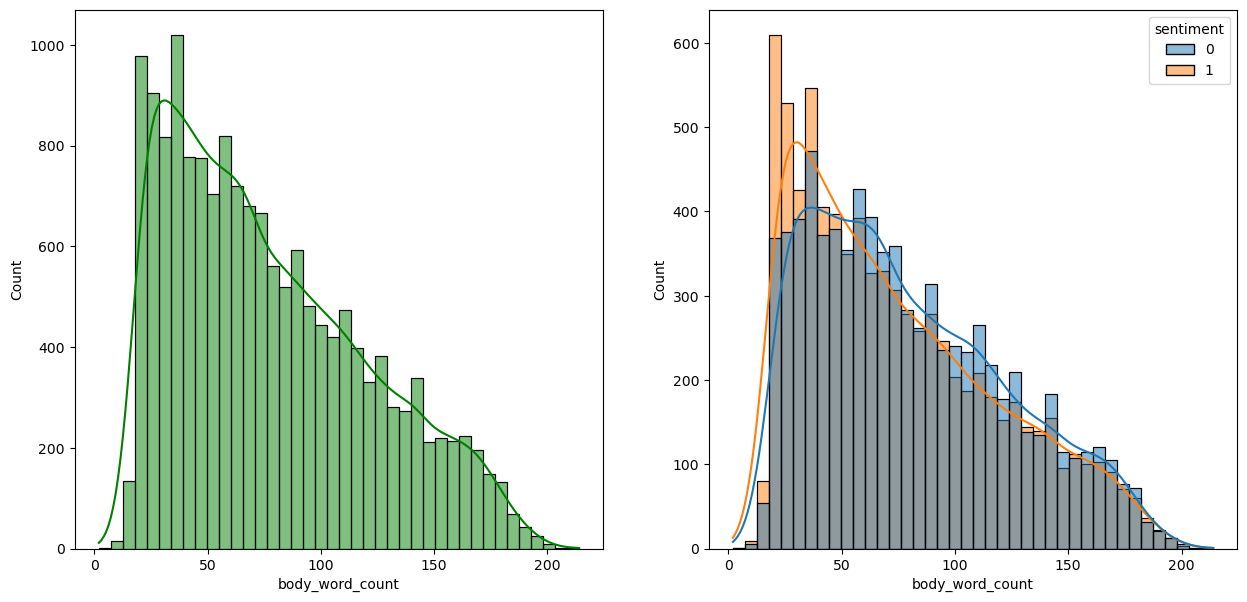

In [130]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = train_df, x = 'body_word_count', kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = train_df, x='body_word_count', hue = 'sentiment', kde = True)
plt.show()

- Most of the reviews 50 words or shorter in length are poistive.
- As length of the review increases after that, the number of negative reviews outnumber the positive ones.

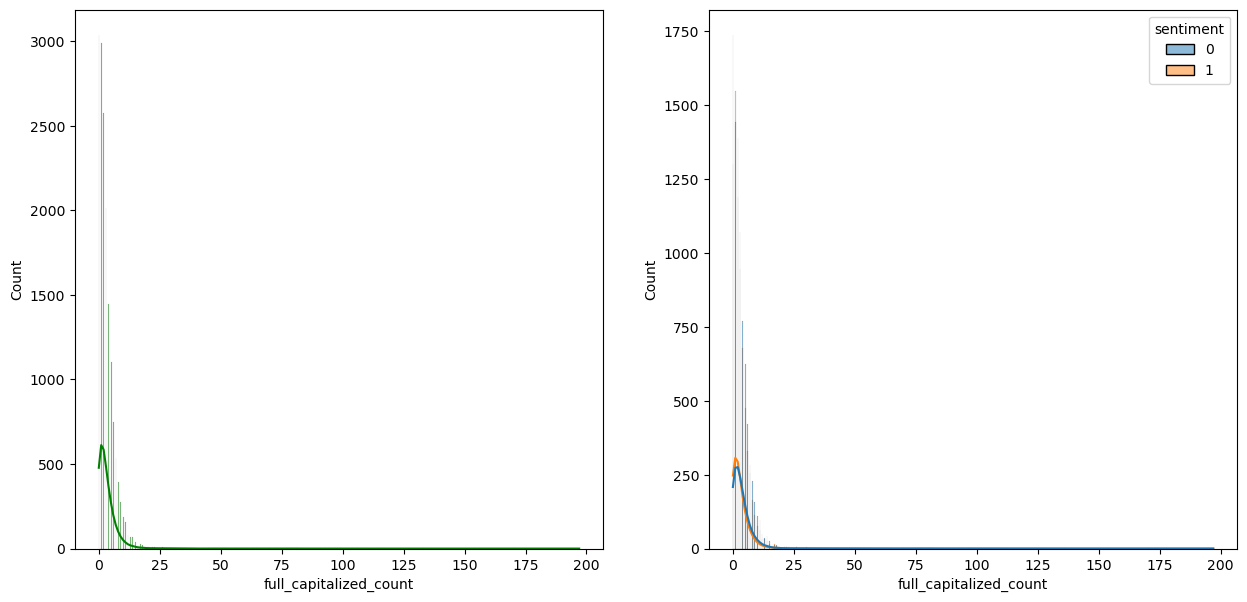

In [131]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = train_df, x = 'full_capitalized_count', kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = train_df, x='full_capitalized_count', hue = 'sentiment', kde = True)
plt.show()

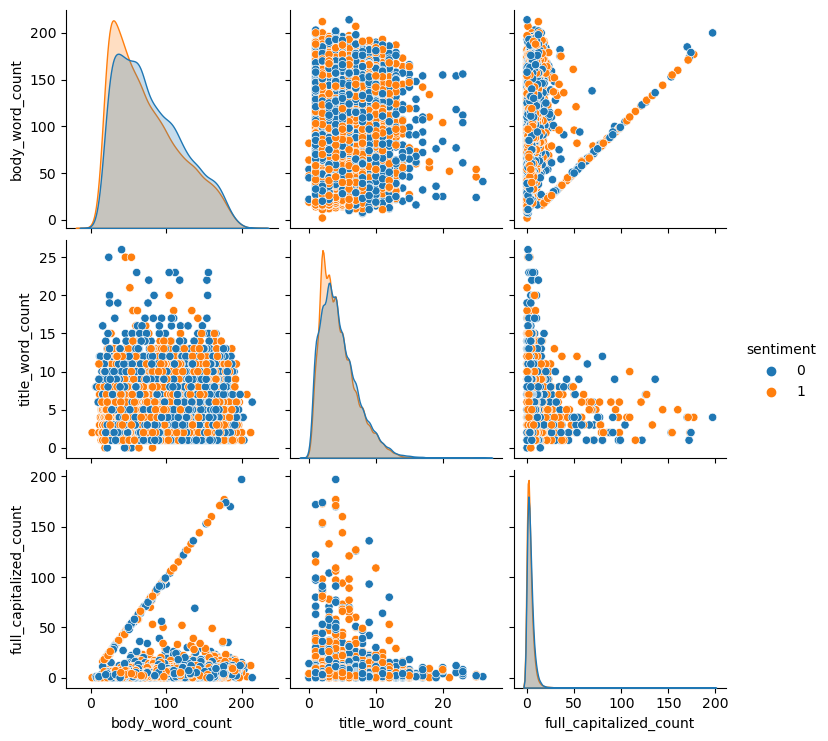

In [133]:
sns.pairplot(train_df,hue = 'sentiment')
plt.show()

# MODEL TRAINING

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


import gensim.downloader as api


In [151]:
train_df.head()

,review_title,review_body,sentiment,body_word_count,title_word_count,full_capitalized_count
0,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,1,75,6,3
1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,1,96,6,6
2,Amazing!,This soundtrack is my favorite music of all ti...,1,136,1,5
3,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,1,120,2,4
4,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",1,80,10,0


In [152]:
X = train_df.drop(columns = ['sentiment'], axis = 1)
X.head()

,review_title,review_body,body_word_count,title_word_count,full_capitalized_count
0,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,75,6,3
1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,96,6,6
2,Amazing!,This soundtrack is my favorite music of all ti...,136,1,5
3,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,120,2,4
4,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",80,10,0


In [153]:
y = train_df['sentiment']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: sentiment, dtype: int64

In [154]:
def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return wv.get_mean_vector(filtered_tokens)

In [155]:
wv = api.load("word2vec-google-news-300")

In [156]:
X['preprocessed_text'] = X['review_body'].apply(lambda x:preprocess_and_vectorize(x))

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X['preprocessed_text'],y,test_size = 0.2, random_state = 44)

In [160]:
X_train_2d = np.stack(X_train)

In [164]:
X_train_2d

array([[ 0.03959389,  0.0049168 ,  0.00529927, ..., -0.01320812,
         0.01838062, -0.00225256],
       [ 0.02318604,  0.02063399, -0.00593422, ...,  0.00637773,
        -0.01536999, -0.01017197],
       [ 0.0275382 , -0.01020641, -0.01635764, ..., -0.03148727,
         0.01592359, -0.00303443],
       ...,
       [-0.00514569,  0.03641447, -0.01947149, ..., -0.01838261,
        -0.00040997, -0.01466386],
       [ 0.02741241,  0.03638924, -0.01125429, ...,  0.00838568,
         0.01000082, -0.01648022],
       [ 0.02069651, -0.00319493, -0.00689813, ..., -0.02699348,
         0.01625291, -0.00475291]], dtype=float32)

In [165]:
X_test_2d = np.stack(X_test)

In [166]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train_2d)
scaled_test = scaler.transform(X_test_2d)

In [167]:
clf = MultinomialNB()
clf.fit(scaled_train,y_train)

MultinomialNB()

In [168]:
y_pred = clf.predict(scaled_test)


In [169]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1590
           1       0.71      0.70      0.71      1610

    accuracy                           0.71      3200
   macro avg       0.71      0.71      0.71      3200
weighted avg       0.71      0.71      0.71      3200



In [172]:
clf = GradientBoostingClassifier()
clf.fit(X_train_2d,y_train)

GradientBoostingClassifier()

In [173]:
y_pred = clf.predict(X_test_2d)


In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1590
           1       0.77      0.75      0.76      1610

    accuracy                           0.77      3200
   macro avg       0.77      0.77      0.77      3200
weighted avg       0.77      0.77      0.77      3200



In [177]:
from xgboost import XGBRegressor


ModuleNotFoundError: No module named 'xgboost'

In [178]:
from sklearn.ensemble import RandomForestRegressor


In [181]:
clf = RandomForestRegressor()
clf.fit(X_train_2d, y_train)

RandomForestRegressor()

In [187]:
y_pred = clf.predict(X_test_2d)
y_pred

array([0.54      , 0.55      , 0.6       , ..., 0.46      , 0.08666667,
       0.75      ])

In [192]:
y_pred =[1 if value > 0.5 else 0 for value in y_pred]

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1590
           1       0.75      0.74      0.75      1610

    accuracy                           0.75      3200
   macro avg       0.75      0.75      0.75      3200
weighted avg       0.75      0.75      0.75      3200



In [202]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso


In [203]:
clf = Ridge()

In [205]:
clf.fit(X_train_2d,y_train)


Ridge()

In [208]:
y_pred =[1 if value > 0.5 else 0 for value in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1590
           1       0.81      0.79      0.80      1610

    accuracy                           0.80      3200
   macro avg       0.80      0.80      0.80      3200
weighted avg       0.80      0.80      0.80      3200



In [209]:
clf = Lasso()

In [210]:
clf.fit(X_train_2d,y_train)


Lasso()

In [211]:
y_pred = clf.predict(X_test_2d)


In [213]:
y_pred =[1 if value > 0.5 else 0 for value in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1590
           1       0.50      1.00      0.67      1610

    accuracy                           0.50      3200
   macro avg       0.25      0.50      0.33      3200
weighted avg       0.25      0.50      0.34      3200



C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
clf = LinearRegression()

In [215]:
clf.fit(X_train_2d, y_train)

LinearRegression()

In [216]:
y_pred = clf.predict(X_test_2d)

In [217]:
y_pred =[1 if value > 0.5 else 0 for value in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1590
           1       0.81      0.80      0.80      1610

    accuracy                           0.80      3200
   macro avg       0.80      0.80      0.80      3200
weighted avg       0.80      0.80      0.80      3200

